In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

2024-09-11 08:15:35.300821: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-11 08:15:35.310357: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-11 08:15:35.320227: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-11 08:15:35.323099: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-11 08:15:35.331026: I tensorflow/core/platform/cpu_feature_guar

In [2]:
SIZE = 256
EPOCHS = 50
BATCH_SIZE = 32
input_shape = (SIZE, SIZE, 3)

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("dataset/train",
                                          target_size = (SIZE, SIZE),
                                          batch_size = BATCH_SIZE,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("dataset/test",
                                        target_size = (SIZE, SIZE),
                                        batch_size = BATCH_SIZE,
                                        class_mode = 'binary')

Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [4]:
train_dataset.class_indices

{'not_pizza': 0, 'pizza': 1}

In [5]:
model = Sequential([
    Conv2D(64, (3, 3), activation="relu", input_shape=input_shape),
    MaxPool2D(),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPool2D(),
    Conv2D(16, (3, 3), activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dropout(0.2),    
    Dense(512, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

/home/rahul/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1726022737.978379    9802 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726022738.545709    9802 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726022738.545848    9802 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726022738.555470    9802 cuda_executor.c

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     7,373,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,414,641 (28.28 MB)

 Trainable params: 7,414,641 (28.28 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer="adam", 
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    verbose=1,
    validation_data=test_dataset
)

Epoch 1/50


/home/rahul/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1726022741.831370    9935 service.cc:146] XLA service 0x7f9eb4016290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726022741.831406    9935 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-09-11 08:15:41.888345: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-11 08:15:42.156329: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 3/50 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.3611 - loss: 0.7828

I0000 00:00:1726022748.505845    9935 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.4694 - loss: 0.7218

2024-09-11 08:15:55.612355: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 68 bytes spill stores, 68 bytes spill loads



50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 225ms/step - accuracy: 0.4704 - loss: 0.7211 - val_accuracy: 0.5000 - val_loss: 0.6919
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.5401 - loss: 0.6885 - val_accuracy: 0.6224 - val_loss: 0.6425
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.6384 - loss: 0.6339 - val_accuracy: 0.6684 - val_loss: 0.6273
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.7123 - loss: 0.5618 - val_accuracy: 0.7194 - val_loss: 0.5392
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.7884 - loss: 0.4617 - val_accuracy: 0.7372 - val_loss: 0.5291
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.8594 - loss: 0.3391 - val_accuracy: 0.7117 - val_loss: 0.6411
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.8732 - loss: 0.2967 - val_accuracy: 0.6888 - val_loss: 0.7137
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9000 - loss: 0.2333 - val_accuracy: 0.7194 - val

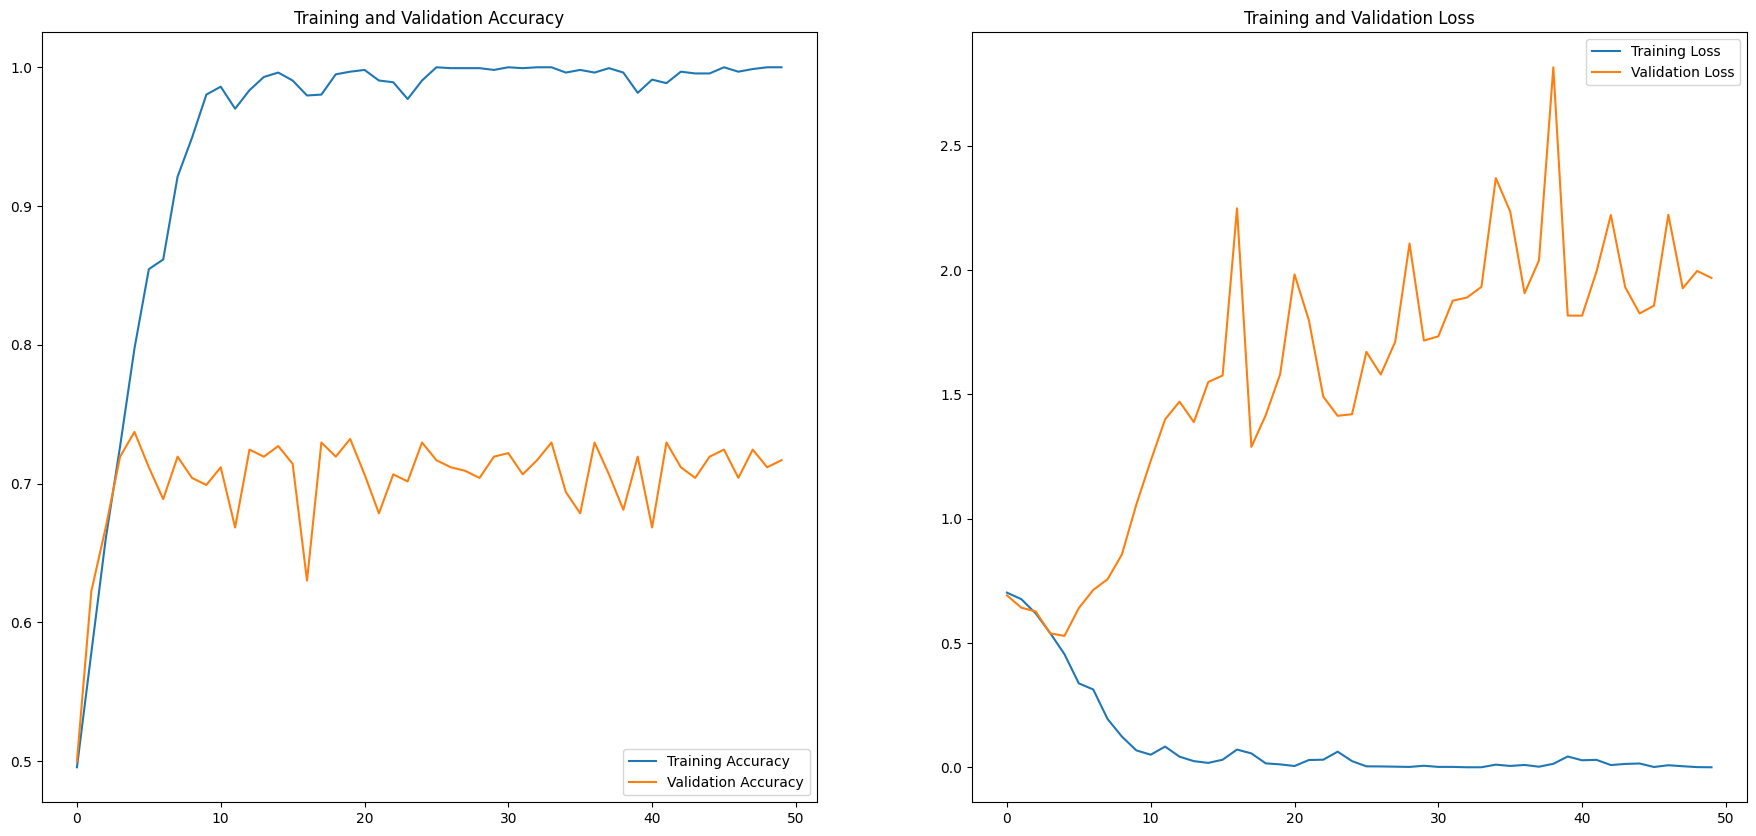

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
trained_epoch = len(acc)
fig = plt.figure(figsize=(22, 10))
plt.subplot(1, 2, 1)
plt.plot(range(trained_epoch), acc, label='Training Accuracy')
plt.plot(range(trained_epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(trained_epoch), loss, label='Training Loss')
plt.plot(range(trained_epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
def pizza_or_not(imgpath):
    img = image.load_img(imgpath, target_size=(SIZE, SIZE))
    plt.imshow(img)
    
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    
    pred_class = model.predict(X)[0][0]
    if(pred_class == 0):
        return "Not Pizza"
    return "Pizza"
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
Not Pizza


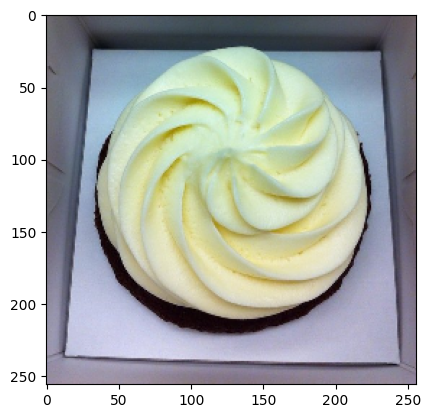

In [11]:
print(pizza_or_not("dataset/test/not_pizza/2620690.jpg"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Not Pizza


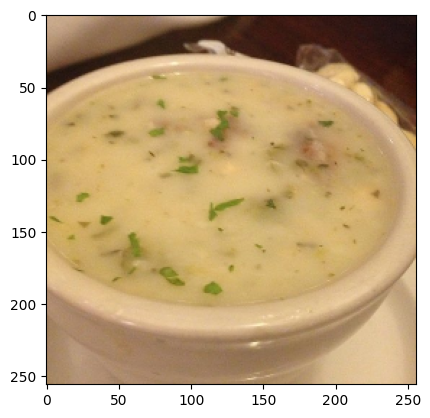

In [12]:
print(pizza_or_not("dataset/test/not_pizza/2476027.jpg"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Pizza


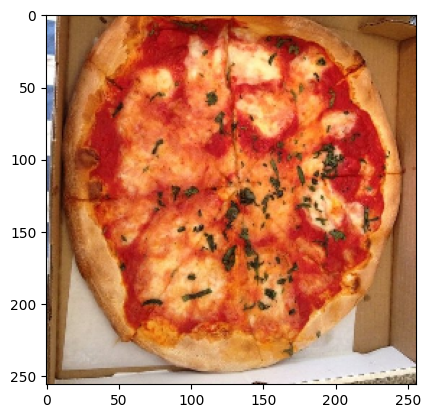

In [13]:
print(pizza_or_not("dataset/test/pizza/1638227.jpg"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Pizza


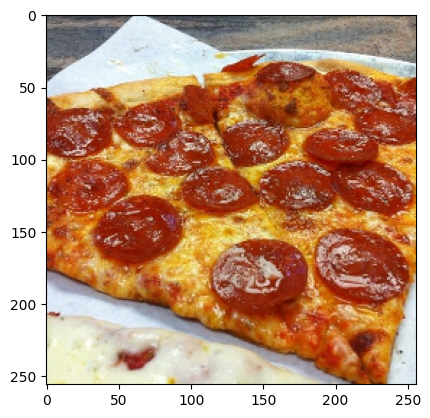

In [18]:
print(pizza_or_not("dataset/test/pizza/1988629.jpg"))